In [87]:
from collections import Counter

from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from pprint import pprint
from time import time

plt.rcParams['figure.figsize'] = [30, 25]
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

# Data loading
categories = ['comp.os.ms-windows.misc', 'sci.space', 'sci.electronics', 'comp.graphics']
news_train = fetch_20newsgroups(
    subset='train',
#     categories=categories
)
news_test = fetch_20newsgroups(
    subset='test',
#     categories=categories
)

In [88]:
def get_top_features(vect, clf, n=10):
    """
    Lists top 'n' discriminant words in class.
    
    :param vect: Instance of a vectoriser used in feature extraction, e.g.
        CountVectorizer, TfidfVectorizer, etc.
    :param clf: Instance of a linear classifier used, e.g. MultinomialNB.
    :param n: How many top features are to be printed.

    :return: A list of n most discriminant words in class.
    """
    feature_names = vect.get_feature_names()

    top_n = np.argsort(clf.coef_[0])[-n:][::-1]
    top_features = [feature_names[i] for i in top_n]

    return top_features

Explore the data first.

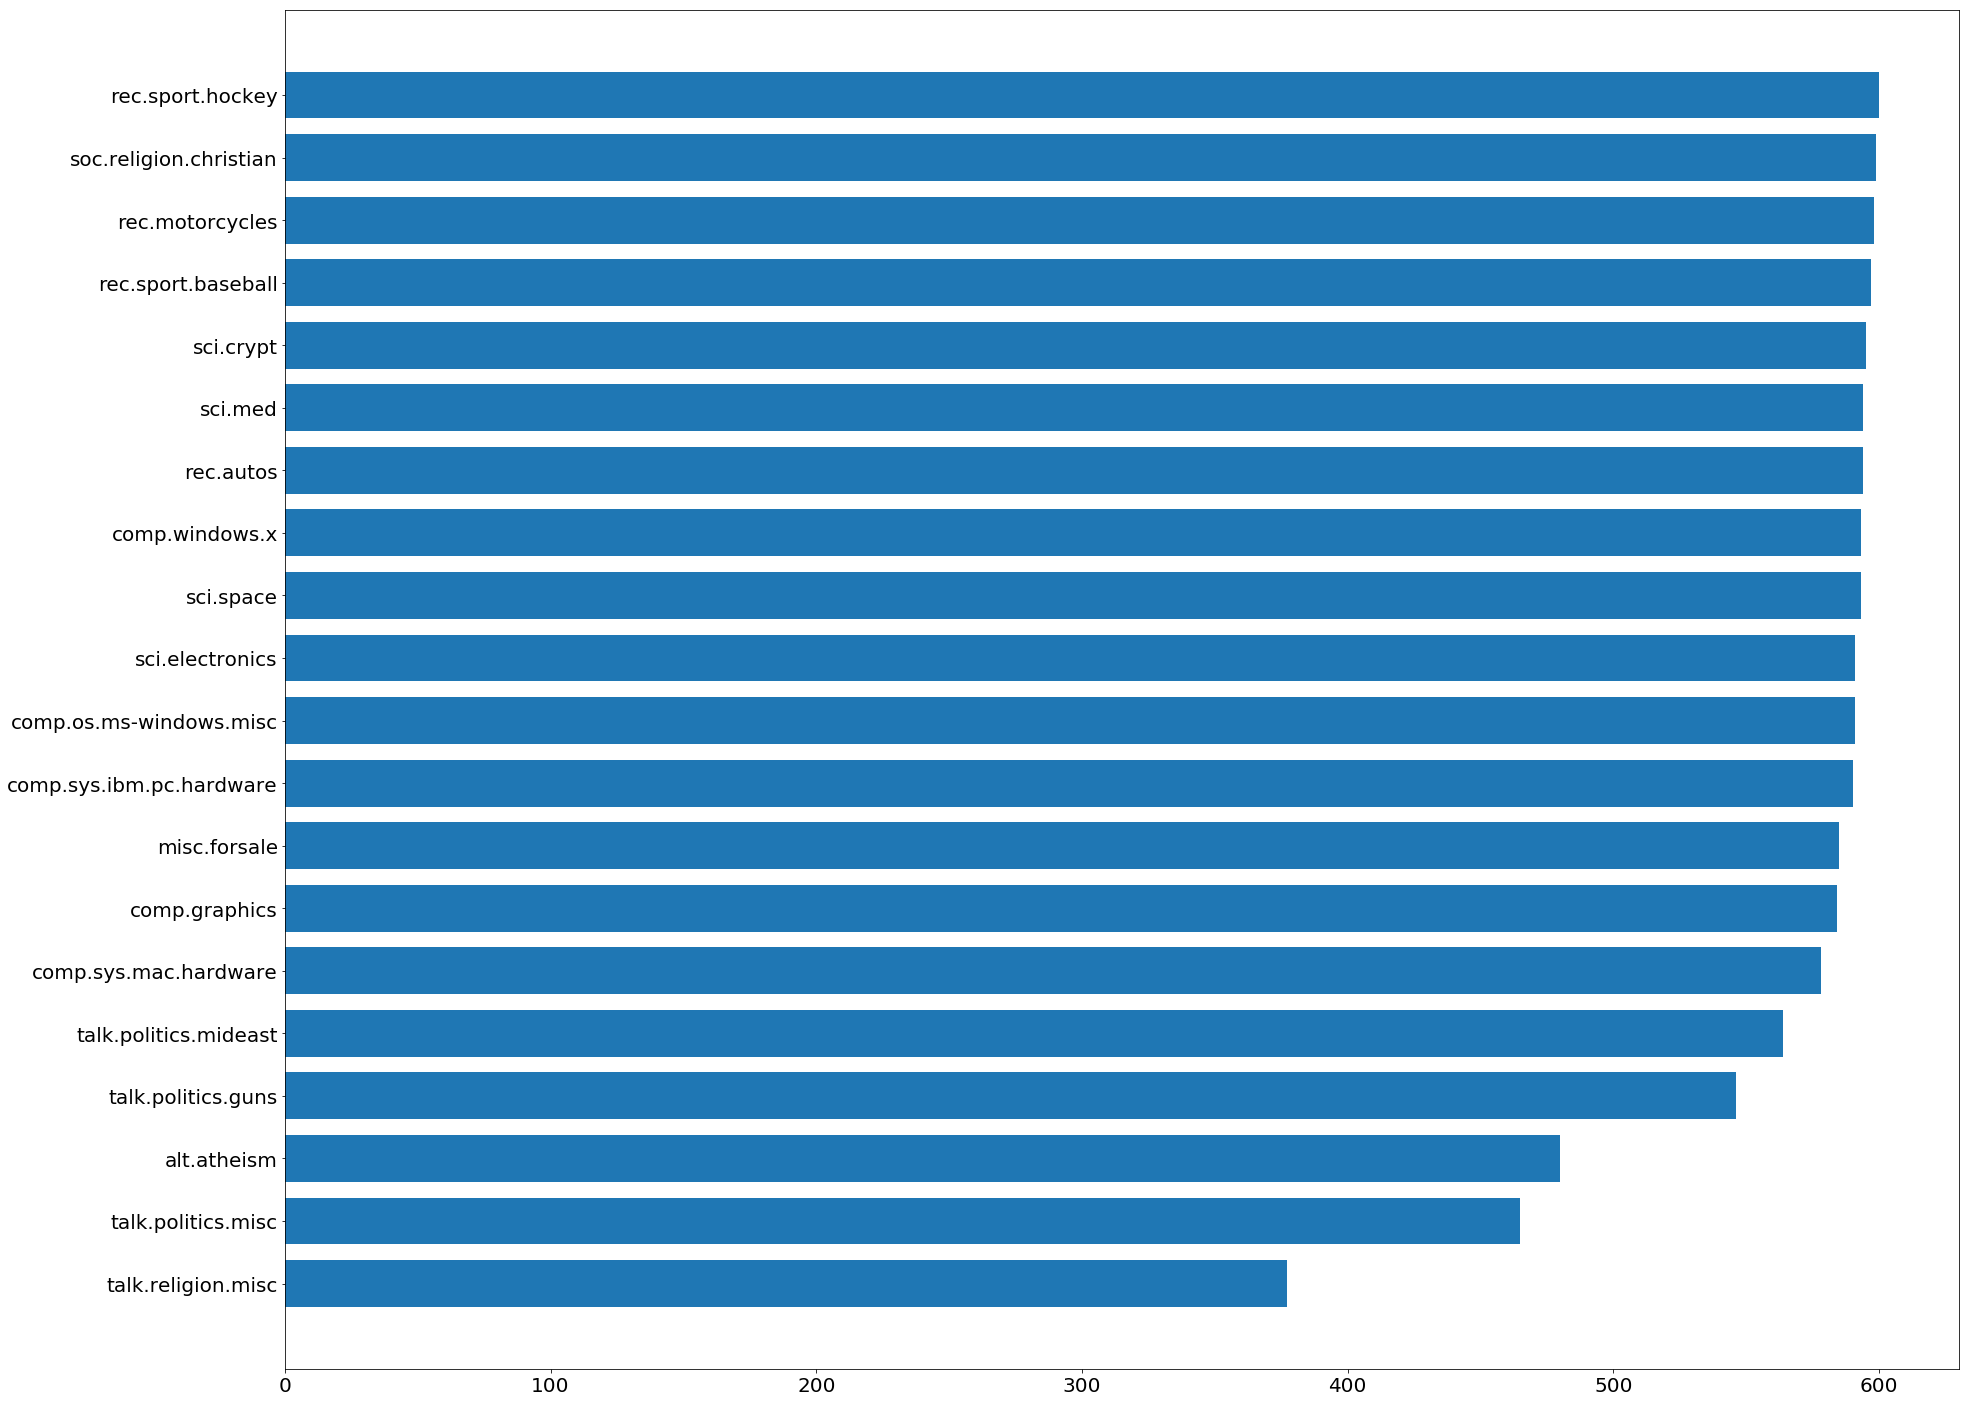

In [89]:
train_counts = {key: val for key, val in Counter(news_train.target).items()}
train_counts = {key: train_counts[key] for key in sorted(train_counts, key=train_counts.get)}
labels = [news_train.target_names[key] for key in train_counts.keys()]

gig, ax =plt.subplots()
ax.barh(range(len(train_counts)), list(train_counts.values()), 0.75, align='center')
ax.set_yticks(np.arange(len(train_counts)))
ax.set_yticklabels(labels)
plt.show()

In [98]:
vect = CountVectorizer(
    # stop_words=stopwords.words('english')
)


train_x = vect.fit_transform(news_train.data)
train_y = news_train.target

test_x = vect.transform(news_test.data)
test_y = news_test.target

print(f"Training set: {len(news_train.target)}")
print(f" Testing set: {len(news_test.target)}")
print(f"Extracted {len(vect.get_feature_names())} features.")

Training set: 11314
 Testing set: 7532
Extracted 130107 features.


In [99]:
cat = 'sci.space'

# train_y = [n == cat for n in train_y]
# test_y = [n == cat for n in test_y]

# print(f"Category: {cat}")
# print(f"Train: {sum(train_y)}/{len(train_y)}")
# print(f" Test: {sum(test_y)}/{len(test_y)}")


In [102]:
# Naive Bayes
nb = MultinomialNB(alpha=0.1)

nb.fit(train_x, train_y)
pred_y = nb.predict(test_x)

print("Scores:")
print(f"Precision: {metrics.precision_score(test_y, pred_y, average='macro'):.3f}")
print(f" Accuracy: {metrics.accuracy_score(test_y, pred_y):.3f}")
print(f" F1-Score: {metrics.f1_score(test_y, pred_y, average='macro'):.3f}")


Scores:
Precision: 0.798
 Accuracy: 0.806
 F1-Score: 0.785
